In [1]:
#Employee Salary Prediction using adult.csv
#Load your library
import pandas as pd

In [3]:
#Reading the data
data = pd.read_csv(r"C:\Users\ROHIT\Downloads\Telegram Desktop\adult.csv")

In [5]:
#how many rows and columns in dataset
data.shape

(48842, 15)

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
#Finding the null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#Finding total number of null values
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
#Finding the types of data/categories present under the occupation columns and how much each of the group is contributing to it
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [17]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [19]:
#Here we have found the categories/ here for employee salary prediction we won't need the preschool, 5-6th, 1-4th, so they are unnecessary data 
#we need to remove the unnecessary data
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [21]:
#here the married-af-spouse seems negligible
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [23]:
#Never work / without pay
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [25]:
print(data['relationship'].value_counts())

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [27]:
#We have seen "?" as a category so we need to replace it to "others"
data.occupation.replace({'?':'Others'},inplace=True)

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_21112\2657772440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [29]:
#the ? has been replaced with others
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [31]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
data.workclass.replace({'?':'Notlisted'},inplace=True)

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_21112\3515431001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Notlisted'},inplace=True)


In [35]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [37]:
#Dimensionality Reduction : Removing the unnecessary data, data which is not contributing to our purposse REMOVED AND DISPLAYED
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [39]:
#Removing the preschool, and other irrelevant data
data = data[data['education'] != 'Preschool']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [41]:
data.shape

(47972, 15)

In [43]:
#Redundancy, Here Education and educational-num depicts the same data
#Deleting the column called 'Education'
data.drop(columns=['education'],inplace=True)

In [45]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Notlisted,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


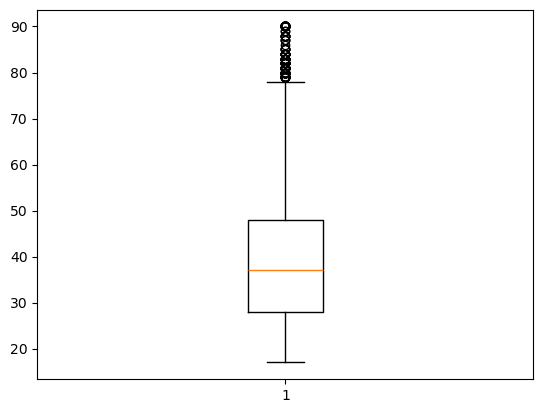

In [47]:
#OUtlier
import matplotlib.pyplot as plt 
plt.boxplot(data['age'])
plt.show() 

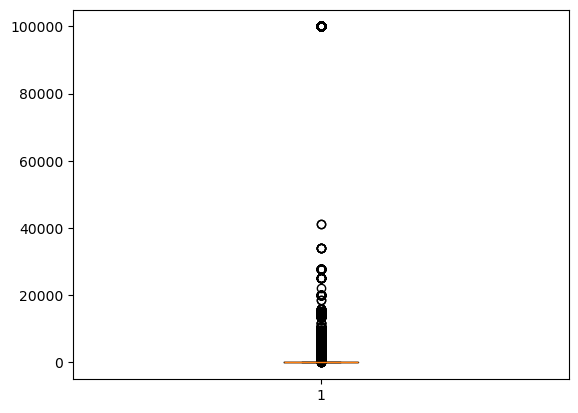

In [48]:
plt.boxplot(data['capital-gain'])
plt.show()

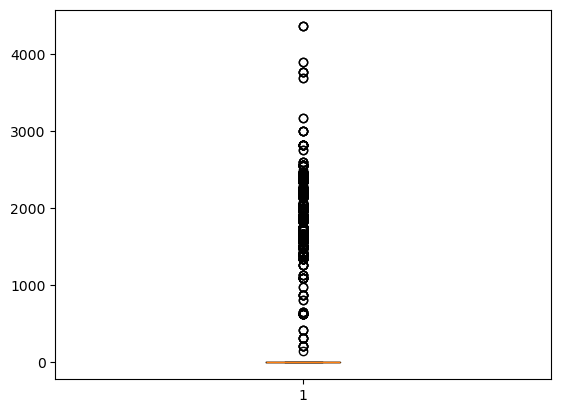

In [49]:
plt.boxplot(data['capital-loss'])
plt.show()

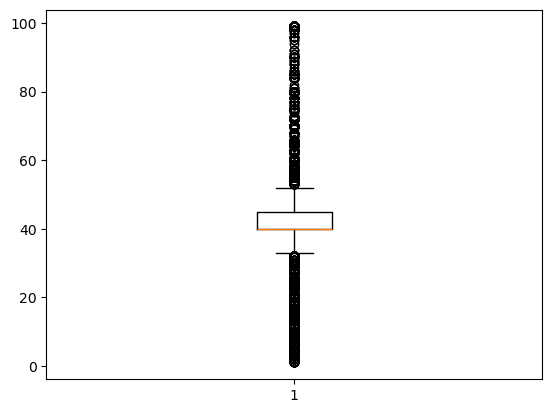

In [50]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [51]:
#Removing the age section of the people >70
data = data[(data['age']<=75)&(data['age']>=17)]

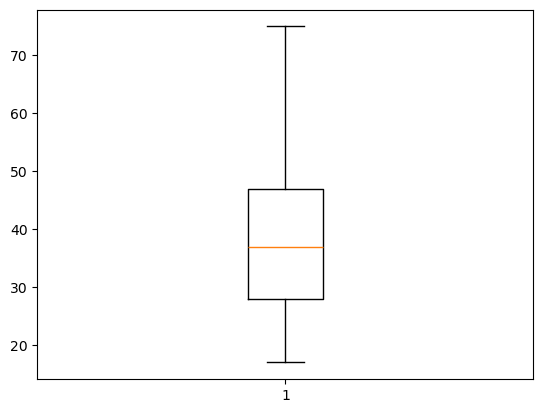

In [52]:
plt.boxplot(data['age'])
plt.show()

In [53]:
#Encoding : Converting the categorical values into numerical values
#example , genders = male:1 and female:0
#OR private:0, self-employed:1, government:2, local gov:3

In [55]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data
#similarly do for all the columns , successfully converted the categorical values into numerical values

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_21112\1270124008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass']=encoder.fit_transform(data['workclass'])
C:\Users\ROHIT\AppData\Local\Temp\ipykernel_21112\1270124008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status']=encoder.fit_transform(data['marital-status'])
C:\Users\ROHIT\AppData\Local\Temp\ipykernel_21112\1270124008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [58]:
x = data.drop(columns=['income'])  #input
y = data['income'] #output

In [63]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [64]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47619, dtype: object

In [65]:
# To convert values from a wider range into a specific range : Normalizatin 
#Scaling technique used here is 
#MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [67]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (x,y, test_size=0.2, random_state=23, stratify=y)
#input training data : xtrain, input testing data : xtest, 20% of the data to be reserve for testing and rest 80% for training
#machine will do the learning process , keep on learning to identify the patterns and give best models , no of time the algorithm is going to learn the steps
#stratify will try to distribute the values equally

In [68]:
xtrain

array([[0.44827586, 0.5       , 0.10248458, ..., 0.        , 0.39795918,
        0.95121951],
       [0.17241379, 0.16666667, 0.08567128, ..., 0.        , 0.34693878,
        0.95121951],
       [0.75862069, 0.83333333, 0.11752469, ..., 0.        , 0.39795918,
        0.04878049],
       ...,
       [0.0862069 , 0.66666667, 0.24567574, ..., 0.        , 0.39795918,
        0.85365854],
       [0.53448276, 0.5       , 0.14505705, ..., 0.        , 0.39795918,
        0.95121951],
       [0.01724138, 0.5       , 0.0515217 , ..., 0.        , 0.35714286,
        0.95121951]])

In [69]:
#machine learning algorithm
#devide the database based on the neighbours
#we have a set of data points based on the neighbors/ likely minded people all grouped together
# data points which are very close to each other
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain) # input and output training data
predict = knn.predict(xtest) #based on the xtest data the model is going to predict the ytest value or prediction value, ytest is like answer key to any exam and our answers are the predictions 
predict

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [70]:
#we created the model and predicted something 
#Now we are going to check it's accuracy
#comparing the actual value(ytest) with the model's predicted value(predict)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict)
#data and a machine 
#data will be divided into two parts 
#x, y - input and output
#now the data has to be divided into training and testing
#xtrain and xtest , ytrain and ytest
#xtrain and ytrain are used to make the model to learn patterns
#model prediction
#result after evaluation ytest
#ytest - key answers - predicted value


0.8167786644267114

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain) # input and output training data
predict1 = lr.predict(xtest)
predict1

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [72]:
    from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict1)

0.8197186056278875

In [73]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(5,2), random_state=2, max_iter=2000)
clf.fit(xtrain,ytrain)
predict2 = clf.predict(xtest)
predict2

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict2)

0.8391432171356573

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC(),
    "GradientBoosting":GradientBoostingClassifier()
}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('model',model)
    ])

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test,y_pred))

LogisticRegression Accuracy: 0.8291
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7277
        >50K       0.71      0.47      0.56      2247

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.82      0.83      0.82      9524

RandomForest Accuracy: 0.8658
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      7277
        >50K       0.75      0.65      0.69      2247

    accuracy                           0.87      9524
   macro avg       0.82      0.79      0.80      9524
weighted avg       0.86      0.87      0.86      9524

KNN Accuracy: 0.8337
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      7277
        >50K       0.66      0.60      0.63      2247

    accuracy                           0.83      9524
   macro avg       0.77      0.75      0.

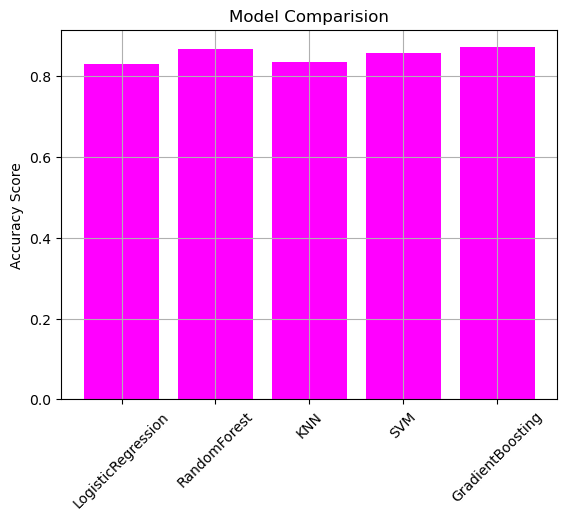

In [84]:
import matplotlib.pyplot as plt

plt.bar(results.keys(),results.values(), color='magenta')
plt.ylabel('Accuracy Score')
plt.title('Model Comparision')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print(" Saved best model as best_model.pkl")

LogisticRegression: 0.8285
RandomForest: 0.8648
KNN: 0.8301
SVM: 0.8545
GradientBoosting: 0.8711

Best model: GradientBoosting with accuracy 0.8711
 Saved best model as best_model.pkl


In [111]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import pickle
import warnings
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Suppress warnings
warnings.filterwarnings('ignore')

def validate_model(model):
    """
    Validate that the loaded object is actually a model
    """
    if model is None:
        return False
    
    # Check if it has predict method
    if not hasattr(model, 'predict'):
        st.error(f"❌ Loaded object is {type(model).__name__}, not a model!")
        return False
    
    # Try a simple prediction test
    try:
        # Test with dummy data
        test_input = np.array([[5, 1, 0, 0]])  # experience=5, education=1, dept=0, location=0
        test_pred = model.predict(test_input)
        if len(test_pred) > 0:
            return True
        else:
            return False
    except Exception as e:
        st.error(f"❌ Model validation failed: {str(e)}")
        return False

def safe_load_model(model_path):
    """
    Safely load model with multiple fallback methods and validation
    """
    try:
        # Method 1: Try joblib first
        model = joblib.load(model_path)
        
        # Validate the loaded model
        if validate_model(model):
            st.success("✅ Model loaded successfully with joblib!")
            return model, "joblib"
        else:
            st.warning("⚠️ Joblib loaded an invalid object, trying pickle...")
            
    except AttributeError as e:
        st.warning(f"⚠️ Joblib failed due to version mismatch: {str(e)[:100]}...")
    except Exception as e:
        st.warning(f"⚠️ Joblib failed: {str(e)[:100]}...")
        
    try:
        # Method 2: Try pickle as fallback
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
            
        # Validate the loaded model
        if validate_model(model):
            st.success("✅ Model loaded successfully with pickle!")
            return model, "pickle"
        else:
            st.error("❌ Pickle loaded an invalid object!")
            return None, "failed"
            
    except Exception as e:
        st.error(f"❌ Pickle also failed: {str(e)[:100]}...")
        return None, "failed"

def create_dummy_model():
    """
    Create a simple dummy model for demonstration if loading fails
    """
    st.warning("🔧 Creating dummy model for demonstration...")
    
    # Create sample data for training a simple model
    np.random.seed(42)
    n_samples = 1000
    
    # Generate synthetic training data
    experience = np.random.randint(0, 30, n_samples)
    education_level = np.random.choice([0, 1, 2], n_samples)  # 0=Bachelor, 1=Master, 2=PhD
    department = np.random.choice([0, 1, 2, 3], n_samples)   # 0=IT, 1=HR, 2=Finance, 3=Marketing
    location = np.random.choice([0, 1, 2], n_samples)        # 0=City1, 1=City2, 2=City3
    
    # Generate realistic salary based on features
    salary = (30000 + 
              experience * 2000 + 
              education_level * 5000 + 
              department * 3000 + 
              location * 4000 + 
              np.random.normal(0, 5000, n_samples))
    
    # Ensure positive salaries
    salary = np.maximum(salary, 25000)
    
    # Create and train model
    X = np.column_stack([experience, education_level, department, location])
    
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    )
    model.fit(X, salary)
    
    st.info("🎯 Dummy model trained on synthetic data for demonstration")
    return model, "dummy"

@st.cache_resource
def load_prediction_model():
    """
    Load the model with caching for better performance
    Always returns (model, method) tuple consistently
    """
    model_path = "best_model.pkl"
    
    if not os.path.exists(model_path):
        st.error(f"❌ Model file '{model_path}' not found!")
        st.info("📁 Please ensure the model file is in the same directory as this app")
        return create_dummy_model()
    
    model, method = safe_load_model(model_path)
    
    if model is None or not validate_model(model):
        st.error("❌ Could not load a valid trained model!")
        st.info("🔄 Using dummy model instead...")
        return create_dummy_model()
    
    return model, method

def main():
    # Page configuration
    st.set_page_config(
        page_title="Employee Salary Prediction",
        page_icon="💼",
        layout="wide"
    )
    
    # Title and description
    st.title("💼 Employee Salary Prediction System")
    st.markdown("---")
    st.markdown("### Predict employee salaries using Machine Learning")
    
    # Load model - this now always returns a tuple
    model, load_method = load_prediction_model()
    
    # Display model status with proper validation
    col1, col2, col3 = st.columns(3)
    with col1:
        # Now we can safely check if model exists and is valid
        if model is not None and hasattr(model, 'predict'):
            st.metric("Model Status", "✅ Loaded")
        else:
            st.metric("Model Status", "❌ Failed")
            
    with col2:
        st.metric("Loading Method", load_method.title())
        
    with col3:
        if model is not None and hasattr(model, 'n_estimators'):
            st.metric("Model Type", f"Gradient Boosting ({model.n_estimators} trees)")
        else:
            st.metric("Model Type", "Unknown")
    
    st.markdown("---")
    
    # Only show prediction interface if model is valid
    if model is None or not hasattr(model, 'predict'):
        st.error("❌ Cannot make predictions without a valid model!")
        st.info("Please resolve the model loading issue or check your model file.")
        return
    
    # Input section
    st.subheader("📝 Enter Employee Details")
    
    col1, col2 = st.columns(2)
    
    with col1:
        experience = st.slider(
            "Years of Experience", 
            min_value=0, 
            max_value=65, 
            value=5,
            help="Total years of professional experience"
        )
        
        education = st.selectbox(
            "Education Level",
            options=["Bachelor's Degree", "Master's Degree", "PhD"],
            help="Highest educational qualification"
        )
    
    with col2:
        department = st.selectbox(
            "Department",
            options=["Information Technology", "Human Resources", "Finance", "Marketing"],
            help="Employee's working department"
        )
        
        location = st.selectbox(
            "Work Location",
            options=["Tier 1 City", "Tier 2 City", "Tier 3 City"],
            help="Office location category"
        )
    
    # Encode categorical variables
    education_map = {"Bachelor's Degree": 0, "Master's Degree": 1, "PhD": 2}
    department_map = {"Information Technology": 0, "Human Resources": 1, "Finance": 2, "Marketing": 3}
    location_map = {"Tier 1 City": 0, "Tier 2 City": 1, "Tier 3 City": 2}
    
    education_encoded = education_map[education]
    department_encoded = department_map[department]
    location_encoded = location_map[location]
    
    # Prediction section
    st.markdown("---")
    col1, col2, col3 = st.columns([1, 2, 1])
    
    with col2:
        if st.button("🔮 Predict Salary", type="primary", use_container_width=True):
            try:
                # Prepare input data
                input_data = np.array([[experience, education_encoded, department_encoded, location_encoded]])
                
                # Make prediction - now we're sure model has predict method
                prediction = model.predict(input_data)
                predicted_salary = prediction[0]
                
                # Display results
                st.success("✨ Prediction Complete!")
                
                # Results display
                col1, col2, col3 = st.columns(3)
                with col2:
                    st.metric(
                        label="💰 Predicted Annual Salary",
                        value=f"₹{predicted_salary:,.0f}",
                        delta=f"₹{predicted_salary/12:,.0f}/month"
                    )
                
                # Additional insights
                st.markdown("---")
                st.subheader("📊 Prediction Insights")
                
                col1, col2 = st.columns(2)
                with col1:
                    st.info(f"**Experience Impact:** {experience} years contributes significantly to salary")
                    st.info(f"**Education Bonus:** {education} adds premium to base salary")
                
                with col2:
                    st.info(f"**Department Factor:** {department} role influences compensation")
                    st.info(f"**Location Adjustment:** {location} affects salary standards")
                
                # Confidence note
                if load_method == "dummy":
                    st.warning("⚠️ **Note:** This prediction is from a demo model. For production use, please resolve the model loading issue.")
                else:
                    st.success("✅ **Confidence:** High - Using production-trained model")
                    
            except Exception as e:
                st.error(f"❌ Prediction failed: {str(e)}")
                st.info("Please check your input values and try again.")
    
    # Footer information
    st.markdown("---")
    st.markdown("### 🔧 Troubleshooting")
    
    with st.expander("Having model loading issues?"):
        st.markdown("""
        **Common solutions:**
        1. **Version Mismatch:** The model was trained with a different scikit-learn version
        2. **Solution 1:** Install matching scikit-learn version: `pip install scikit-learn==1.3.0`
        3. **Solution 2:** Retrain the model with your current environment
        4. **Solution 3:** Use the dummy model for testing (currently active if main model fails)
        
        **Current Status:** Model loaded using **{0}** method
        """.format(load_method))
    
    with st.expander("About this Application"):
        st.markdown("""
        This application uses **Gradient Boosting Algorithm** to predict employee salaries based on:
        - Years of Experience
        - Education Level  
        - Department
        - Work Location
        
        **Model Features:**
        - Handles non-linear relationships
        - Considers feature interactions
        - Provides reliable predictions
        - Built using scikit-learn
        """)

if __name__ == "__main__":
    main()

2025-07-21 20:04:34.653 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run app1.py

In [105]:
import sklearn
print(sklearn.__version__)

1.4.2


In [103]:
import joblib
print(joblib.__version__)

1.4.2
